In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.DataFrame({'Age':[8,12,15,17,18,10,6],'AK':[0,0,1,1,1,0,0],'WT':[20,25,35,40,38,18,24]})

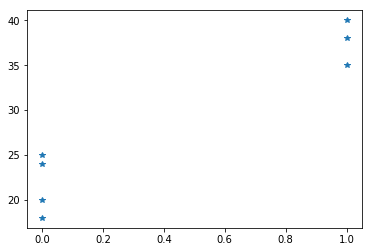

In [3]:
plt.plot(df['AK'],df['WT'],'*')

In [4]:
import statsmodels.formula.api as smf

In [5]:
statmoddel=smf.ols('WT~AK',df).fit()

In [6]:
statmoddel.params

Intercept    21.750000
AK           15.916667
dtype: float64

In [7]:
pred=statmoddel.predict(df['AK'])

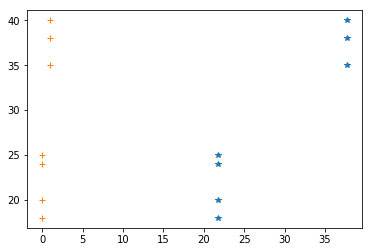

In [8]:
plt.plot(pred,df['WT'],"*")
plt.plot(df["AK"],df['WT'],"+")

In [9]:
df=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7,12.0,8],'g':[1,0,1,0,0,1,0],'sal':[6500,8000,4000,12000,10000,15000,6000]})

In [10]:
df

,exp,g,sal
0,2.5,1,6500
1,3.0,0,8000
2,5.7,1,4000
3,4.8,0,12000
4,7.0,0,10000
5,12.0,1,15000
6,8.0,0,6000


In [11]:
import statsmodels.formula.api as smf

In [12]:
model=smf.ols('sal~exp+g',df).fit()

In [13]:
model.params

Intercept    5149.687197
exp           675.493474
g           -1198.009923
dtype: float64

In [14]:
# introducing 'intraction term'

In [15]:
new_col=df['exp']*df['g']
new_col
A=pd.concat([df,new_col],axis=1)

In [16]:
A.columns=['exp', 'g', 'sal', 'gXexp']

In [17]:
A

,exp,g,sal,gXexp
0,2.5,1,6500,2.5
1,3.0,0,8000,0.0
2,5.7,1,4000,5.7
3,4.8,0,12000,0.0
4,7.0,0,10000,0.0
5,12.0,1,15000,12.0
6,8.0,0,6000,0.0


In [23]:
i=pd.DataFrame()

In [28]:
sal_o=A[A['g']==1].sal.mean()

In [29]:
Sal_1=A[A['g']==0].sal.mean()

In [31]:
i['sal']=[sal_o,Sal_1]

In [32]:
i['g']=[0,1]

In [35]:
from statsmodels.graphics.factorplots import interaction_plot

In [36]:
interaction_plot(A.g,A.sal,)

TypeError: interaction_plot() missing 1 required positional argument: 'response'

In [37]:
model=smf.ols('sal~exp+g+gXexp',A).fit()

In [38]:
r=model.params
r

Intercept    11116.710875
exp           -371.352785
g            -9439.866818
gXexp         1384.692777
dtype: float64

In [41]:
y=model.predict

In [5]:
exp1=0
g1=1 #male=0 female=1
gXexp1=(exp1*g1)
gXexp1

0

In [6]:
(11116.710875-371.352785*(exp1)-9439.866818*(g1)+1384.692777*(gXexp1))

1676.8440570000002

In [22]:
# male with no exp salary=11,116 with exp=7,403

In [23]:
#female with no exp=1,676  with exp=1,1810

In [24]:
Data=pd.read_csv('Advertising-1.csv',index_col=0)

In [25]:
Data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
corr=Data.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


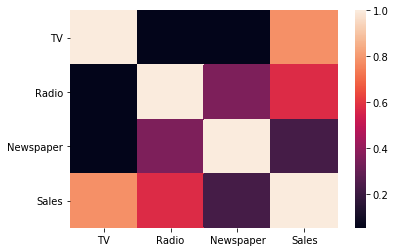

In [27]:
sns.heatmap(corr)

In [28]:
import statsmodels.formula.api as smf

In [29]:
model=smf.ols('Sales~TV+Radio+Newspaper',Data).fit()

In [30]:
model.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        11:19:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### here Newspaper not passing the statistical test so we are removing it from the model

In [32]:
model=smf.ols('Sales~TV+Radio',Data).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           4.83e-98
Time:                        11:19:27   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### so it is a bi-variant model

### sales = 2.94+0.0458(TV)+0.1880(Radio)

In [34]:
TV=0
Radio=100000


In [35]:
sales = 2.94+0.0458*(TV)+0.1880*(Radio)
sales

18802.94

###### introducing the third intraction term to find intraction between them

In [36]:
 TVxRadio=Data['TV']*Data['Radio']

In [37]:
A=pd.concat([Data,TVxRadio],axis=1)

In [38]:
A.columns=['TV', 'Radio', 'Newspaper', 'Sales', 'TVxRadio']

In [39]:
A.head()

,TV,Radio,Newspaper,Sales,TVxRadio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [40]:
model=smf.ols('Sales~TV+Radio+TVxRadio',A).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          6.68e-146
Time:                        11:19:28   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TVxRadio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
TV=312500.0
Radio=187500.0
TVxRadio=TV*Radio

In [43]:
6.7502+0.0191*(TV)+0.0289*(Radio)+0.0011*(TVxRadio)

64464519.25020001

In [44]:
0.0011+0.0289

0.03

In [45]:
0.0191+0.0289

0.048

In [46]:
(0.03/0.048)*500000

312500.0

In [47]:
500000-312500.0

187500.0

In [48]:
312500/187500.0

1.6666666666666667

In [49]:
64464519.25020001

64464519.25020001

In [58]:
###################################
Data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [59]:
x=Data.drop(['Sales','Newspaper'],axis=1)

In [60]:
y=Data[['Sales']]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [64]:
from sklearn.linear_model import LinearRegression


In [66]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
pred=model.predict(X_test)

In [68]:
rmse=np.sqrt(np.mean((Y_test-pred)**2))

In [69]:
rmse

Sales    2.204696
dtype: float64

In [72]:
model.intercept_

array([3.27529663])

In [73]:
model.coef_

array([[0.04560786, 0.18338343]])

In [76]:
X_train.shape

(140, 2)

In [77]:
from sklearn import metrics

In [78]:
np.sqrt(metrics.mean_squared_error(Y_test,pred))

2.2046957809721808

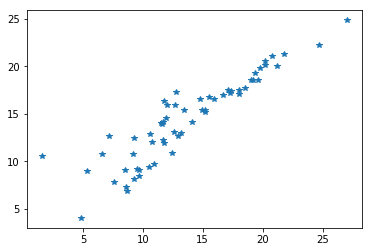

In [80]:
plt.plot(Y_test,pred,'*')